In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# import data
data = pd.ExcelFile('GordonChristopher_LE BN CR data for figures - Body Comp.xlsx')
sheetnames=data.sheet_names
# import all the worksheets
d={}
sheetname=[None] * 13
for i in range(13):
    name=sheetnames[i].replace(' ', '') # remove space from the worksheetname
    sheetname[i]=name
    if i == 0:
        globals()[name]= data.parse(sheetnames[i],header=1)
    else:
        globals()[name]= data.parse(sheetnames[i])
# clean up the data
mymice=np.arange(60)
for x in sheetname:
    existmice=np.where(pd.isnull(globals()[x].iloc[:,6])==False) # remove overfat and dead mice
    notaverow=np.where(pd.isnull(globals()[x].iloc[:,0])==False) # remove average row from data
    bothrow=np.intersect1d(existmice,notaverow) # the overlapping row within one worksheet
    mymice=np.intersect1d(mymice,bothrow) # overlapping between worksheet\
# get the 'new' dataset
newsheetname=[None] * 13
for i in range(13):
    x='new'+sheetname[i]
    newsheetname[i]=x
    globals()[x]=globals()[sheetname[i]].iloc[mymice,:] # only the mice never have miss any data

In [2]:
# test and train ind base on dataframe input
def test_train_id(data,test_frac):
    testnumber=round(len(data)*test_frac)
    ids=list(data.index)
    np.random.shuffle(ids)
    test=ids[0:testnumber]
    test.sort()
    train=ids[testnumber:]  
    train.sort()
    return train,test,testnumber
# days in experiment
day=[89,117,152,180,209,244,272,300,335,363,384,421,447]
daydiff=[0,117-89,152-89,180-89,209-89,244-89,272-89,300-89,335-89,363-89,384-89,421-89,447-89]
# six groups in experiment
groups=newPND89.Group.unique()

In [3]:
def group_measure(group,measure):
# random assign train and test ind based on 'first day'
    BLPND89=globals()[newsheetname[0]][globals()[newsheetname[0]]['Group'].str.contains(group,case=False)]
    train,test,testnumber=test_train_id(BLPND89,0.3)
# pull data based on ind
    trainweight=[None]*13
    testweight=[None]*13
    avetrainweight=[None]*13
    for i in range(13):
        bl1=globals()[sheetname[i]].iloc[test,:]
        testweight[i]=bl1[measure]
        bl2=globals()[sheetname[i]].iloc[train,:]
        trainweight[i]=bl2[measure]
        avetrainweight[i]=np.mean(bl2[measure])
    traindiff=[None]*13
    testdiff=[None]*13
    avetraindiff=[None]*13
    for i in range(0,13):
        if i==0:
            testdiff[i]=testweight[i]-testweight[0]
            traindiff[i]=trainweight[i]-trainweight[0]
            avetraindiff[i]=np.mean(traindiff[i])
        else:
            testdiff[i]=testweight[i]-testweight[0]
            traindiff[i]=trainweight[i]-trainweight[0]
            avetraindiff[i]=np.mean(traindiff[i])
            
# linear regression
    model = LinearRegression(fit_intercept=True)
    model.fit(np.asarray(daydiff)[:,np.newaxis], np.asarray(avetraindiff))
    slope=model.coef_
    intercept=model.intercept_

# "predict" based on day
    predict=model.predict(np.asarray(daydiff)[:, np.newaxis])

# check accuracy of the regression
    error=sum(abs(testdiff[-1]-predict[-1])/testdiff[-1])
    percenterror=error/2
    
    return slope,intercept,percenterror,traindiff,avetraindiff,predict,testdiff

# Weight

BN ad lib percentage error is 0.0446202244611
BN 10% restriction percentage error is 0.105498676863
BN 20% restriction percentage error is 0.0467698451441
LE ad lib percentage error is 0.0164365583528
LE 10% restriction percentage error is 0.185127356645
LE 20% restriction percentage error is 0.163811411376


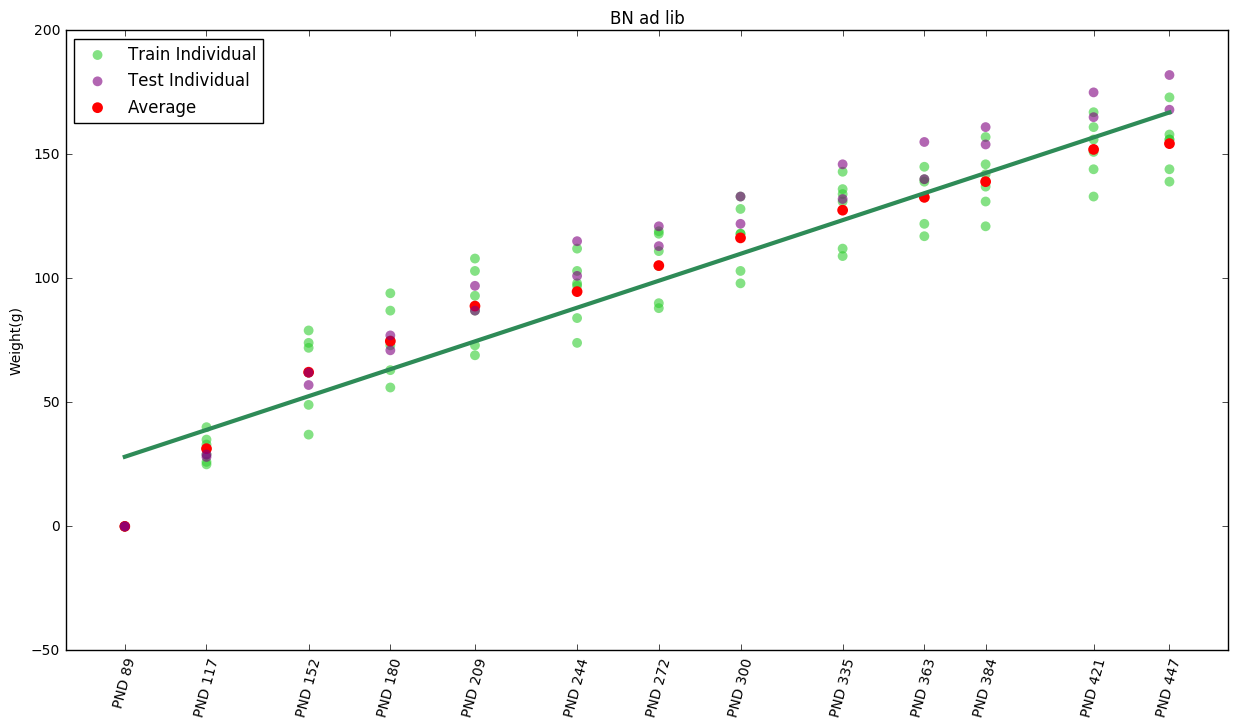

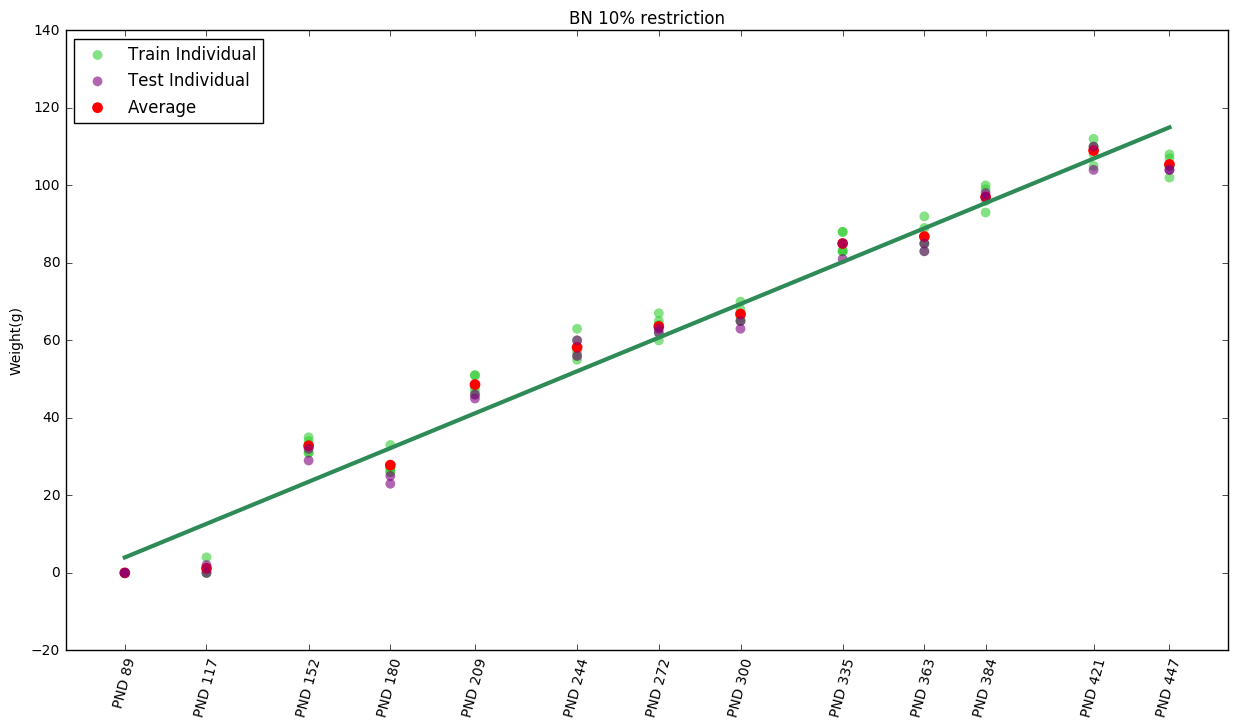

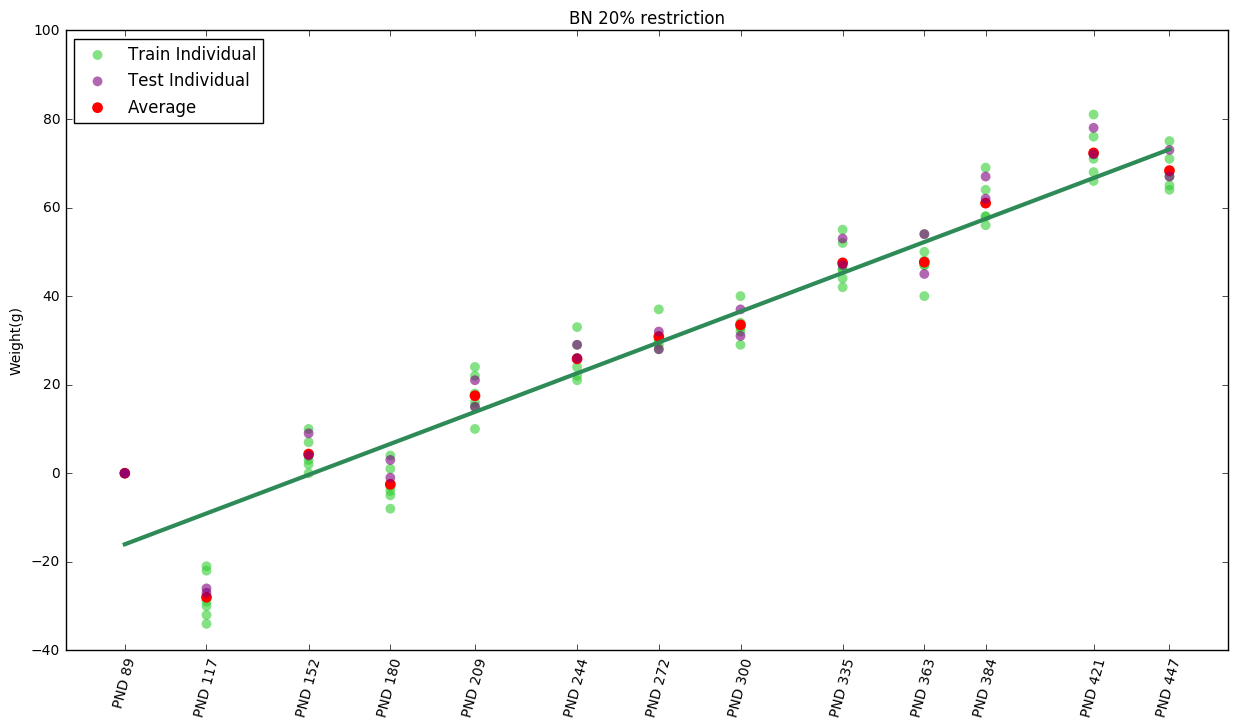

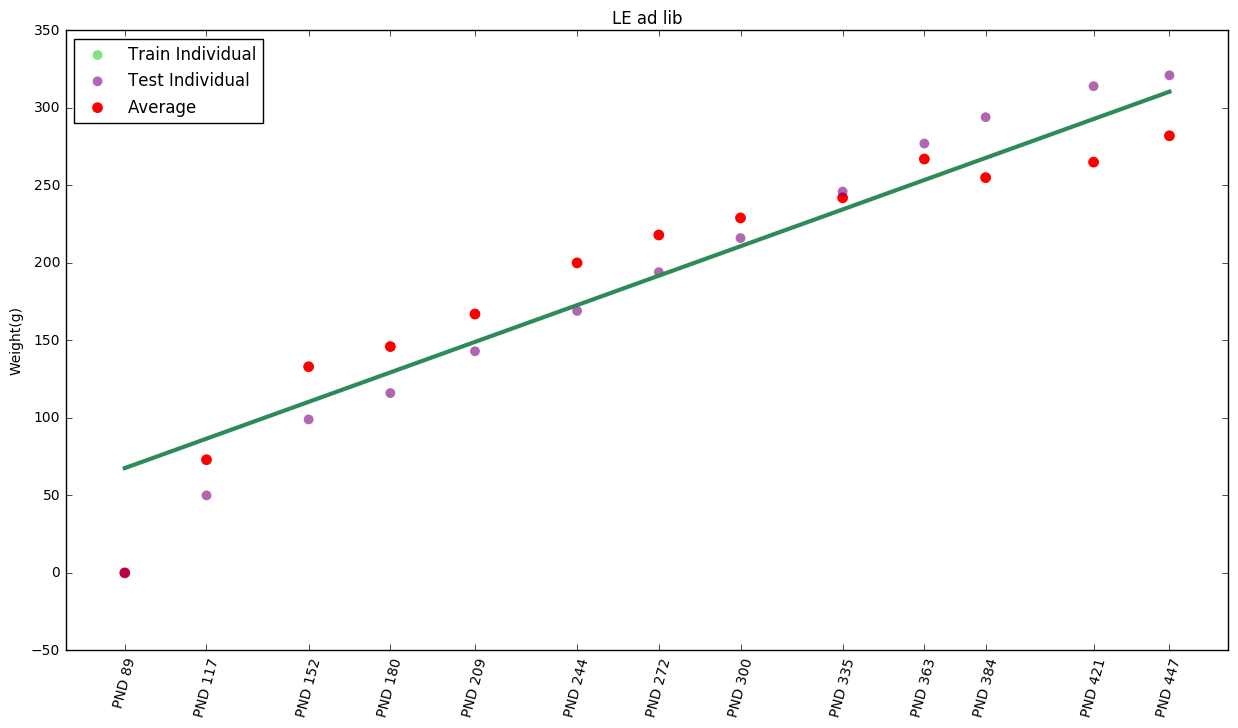

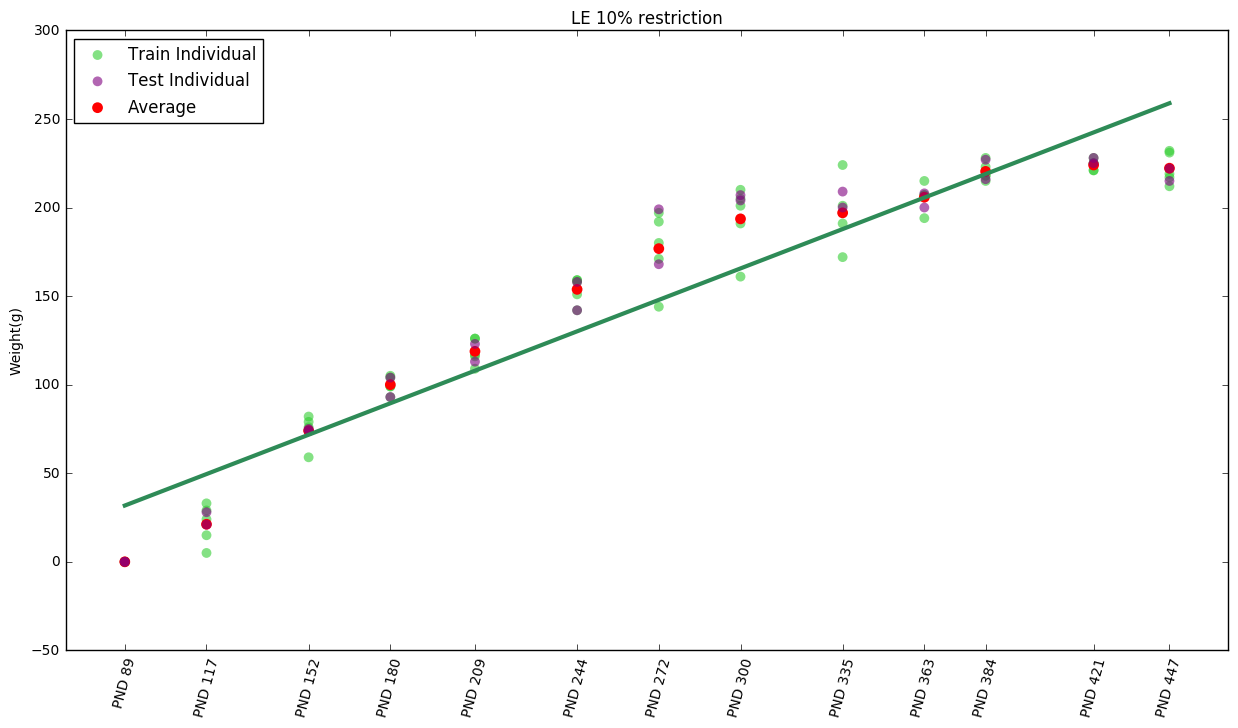

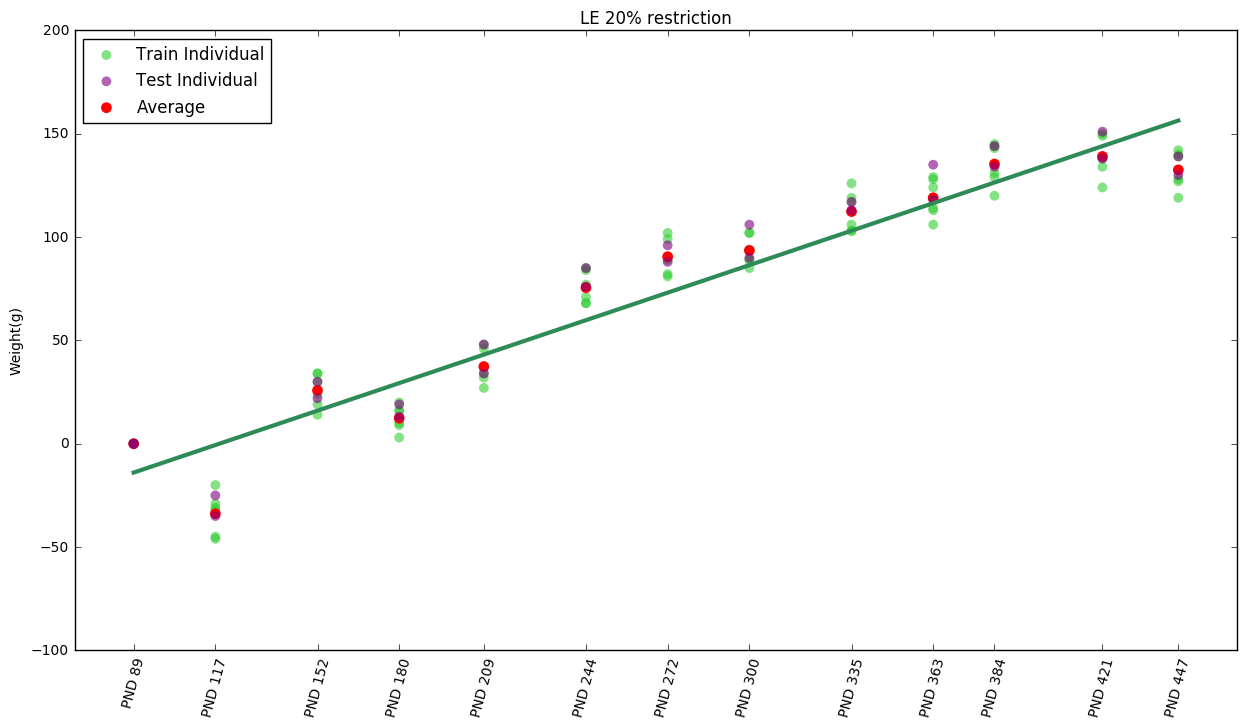

In [4]:
wtprediction=[None]*6
for i in range(6):
    slope,intercept,percenterror,traindiff,avetraindiff,wtprediction[i],testdiff=group_measure(groups[i],'Sample Weight (g)')
    Fig=plt.figure(figsize=(15,8))
    for xe, ye in zip(day, traindiff):
        indi=plt.scatter([xe] * len(ye), ye, c="limegreen",alpha=0.6,s=50,edgecolors='none')
    plt.xticks([89,117,152,180,209,244,272,300,335,363,384,421,447])
    plt.axes().set_xticklabels(sheetnames,rotation=75)
# average point
    average=plt.scatter(day,avetraindiff, c="red",s=60,edgecolors='none',label="Aveage")
# plot linear regression
    plt.plot(np.asarray(day), wtprediction[i], color='seagreen',linewidth=3)
# plot test group
    for xe, ye in zip(day, testdiff):
        testindi=plt.scatter([xe] * len(ye), ye, c="purple",alpha=0.6,s=50,edgecolors='none')
# set up figure 
    plt.legend((indi,testindi,average),('Train Individual','Test Individual','Average'),scatterpoints=1,loc='upper left')
    plt.title(groups[i])
    plt.ylabel('Weight(g)')
    print(groups[i],'percentage error is',percenterror)

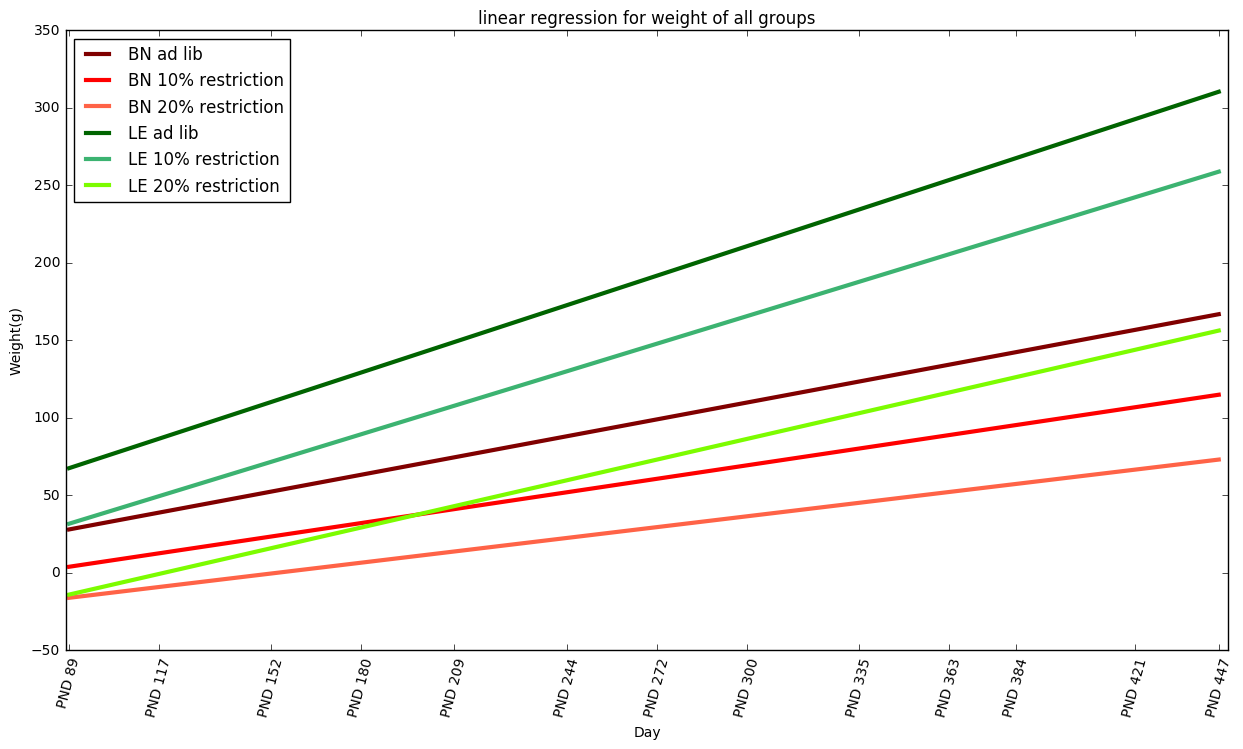

In [5]:
Fig=plt.figure(figsize=(15,8))
color=['maroon','red','tomato','darkgreen','mediumseagreen','lawngreen']
for i in range (6):
    plt.plot(np.asarray(day), wtprediction[i], color=color[i],linewidth=3,label=groups[i])
plt.legend(loc='upper left')
plt.xticks([89,117,152,180,209,244,272,300,335,363,384,421,447])
plt.xlim(88,450)
#plt.ylim(200,500)
plt.axes().set_xticklabels(sheetnames,rotation=75)
plt.title('linear regression for weight of all groups')
plt.ylabel('Weight(g)')
plt.xlabel('Day')

# % Fat

BN ad lib percentage error is 0.477455818609
BN 10% restriction percentage error is 0.378710140284
BN 20% restriction percentage error is 0.611883045303
LE ad lib percentage error is 0.188658352924
LE 10% restriction percentage error is 0.113058857933
LE 20% restriction percentage error is 0.667164911339


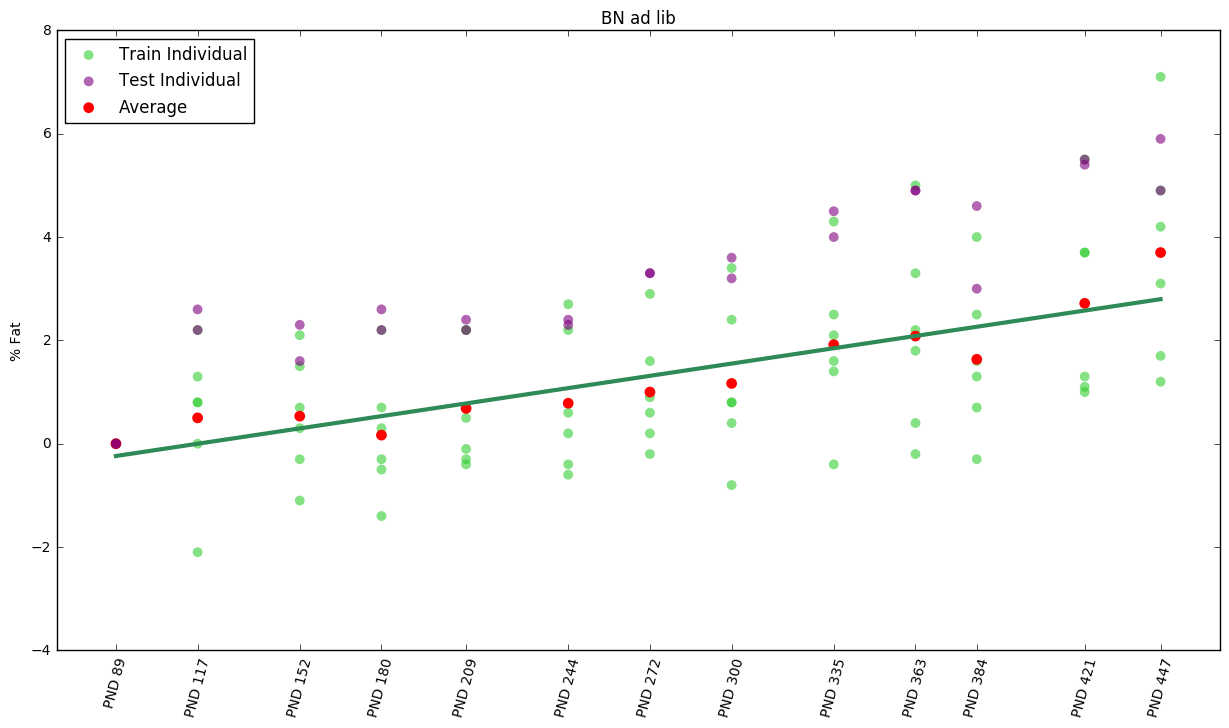

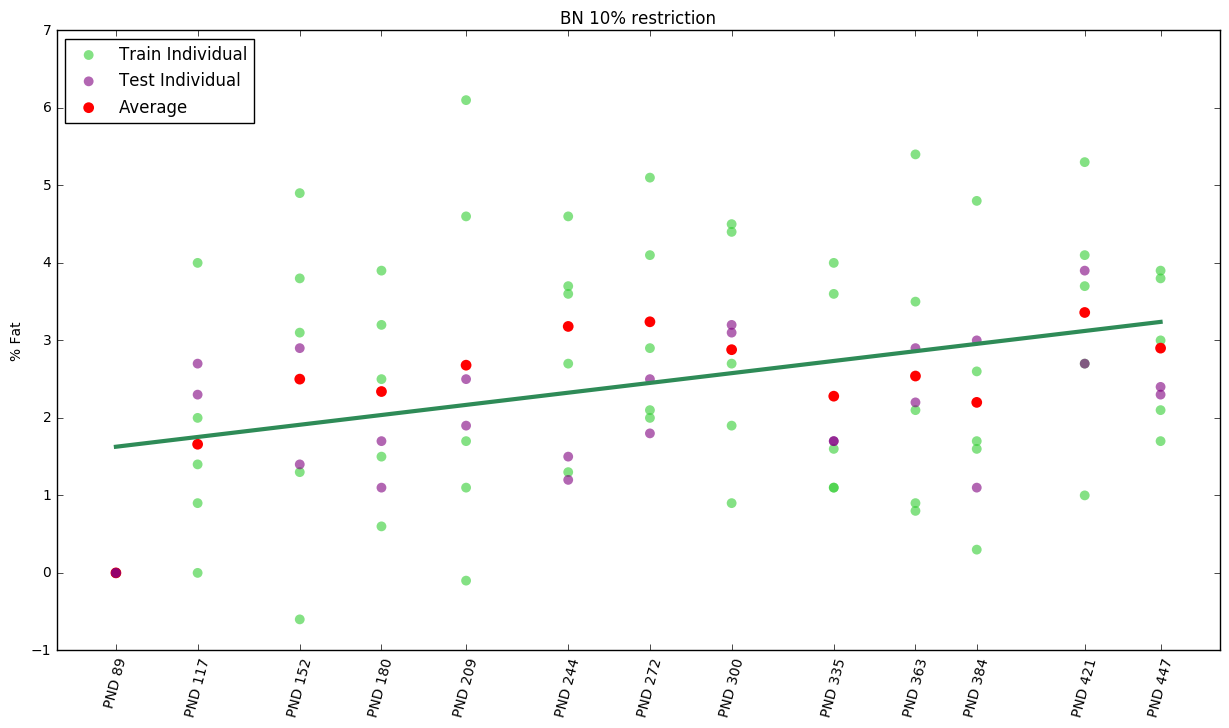

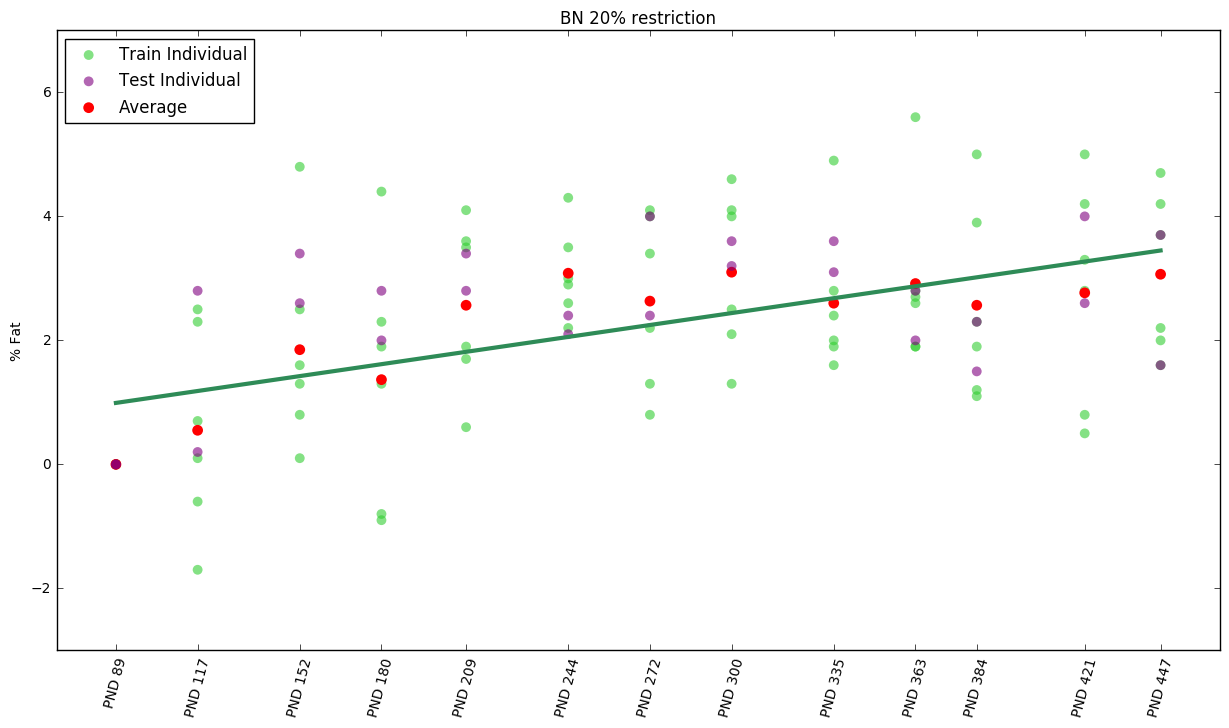

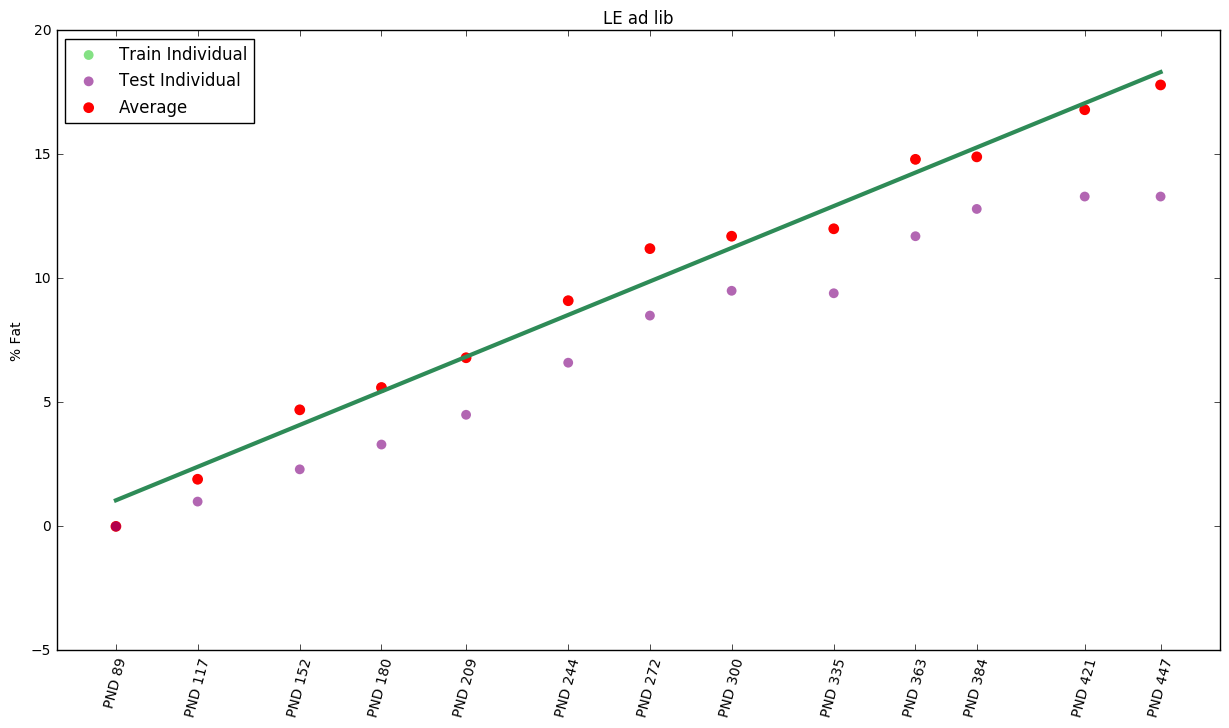

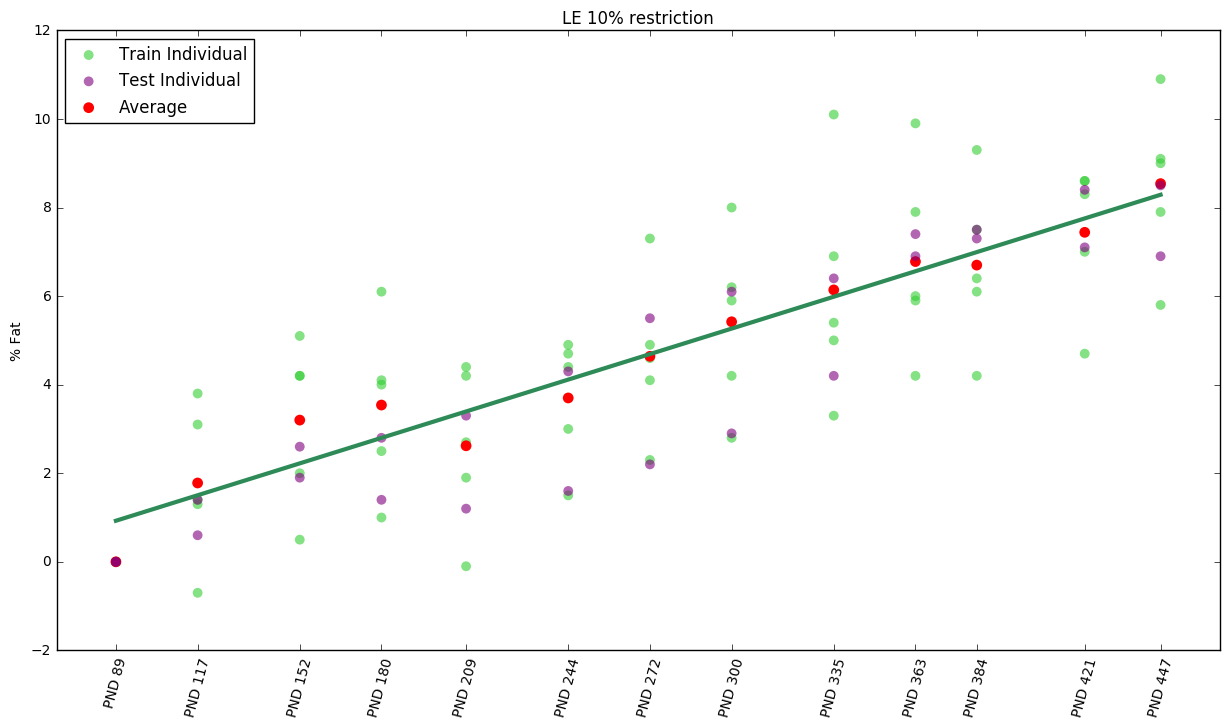

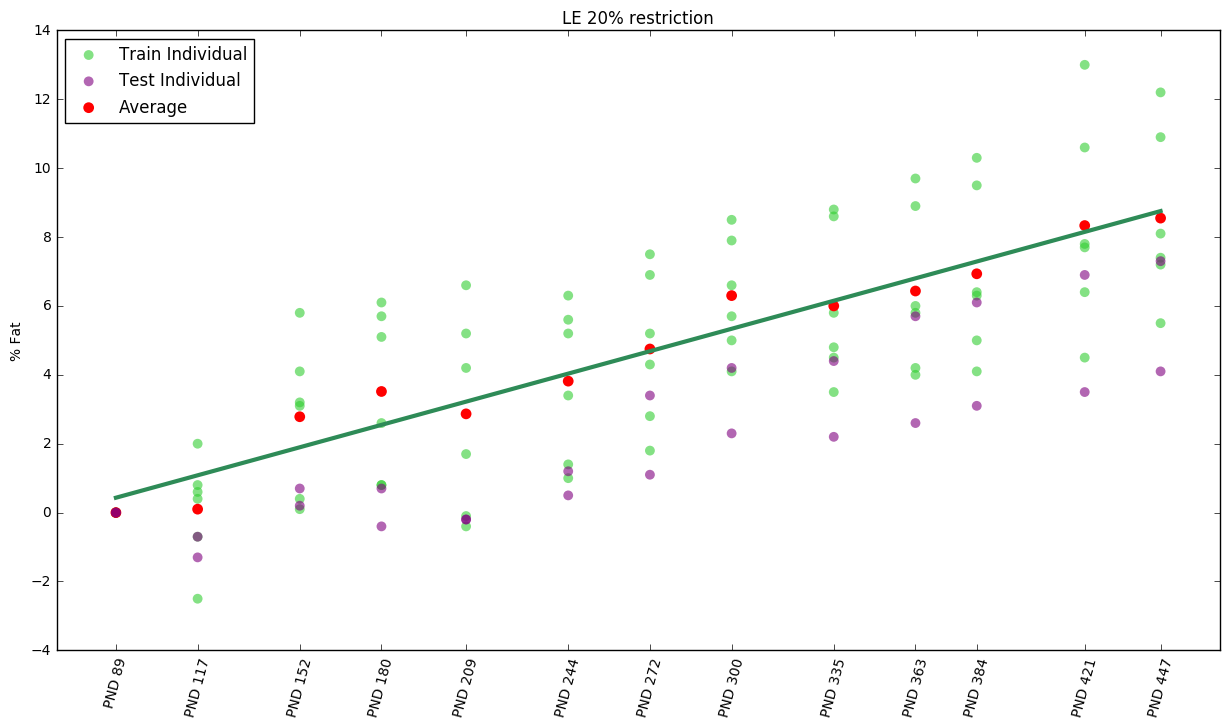

In [6]:
fatprediction=[None]*6
for i in range(6):
    slope,intercept,percenterror,traindiff,avetraindiff,fatprediction[i],testdiff=group_measure(groups[i],'% Fat')
    Fig=plt.figure(figsize=(15,8))
    for xe, ye in zip(day, traindiff):
        indi=plt.scatter([xe] * len(ye), ye, c="limegreen",alpha=0.6,s=50,edgecolors='none')
    plt.xticks([89,117,152,180,209,244,272,300,335,363,384,421,447])
    plt.axes().set_xticklabels(sheetnames,rotation=75)
# average point
    average=plt.scatter(day,avetraindiff, c="red",s=60,edgecolors='none',label="Aveage")
# plot linear regression
    plt.plot(np.asarray(day), fatprediction[i], color='seagreen',linewidth=3)
# plot test group
    for xe, ye in zip(day, testdiff):
        testindi=plt.scatter([xe] * len(ye), ye, c="purple",alpha=0.6,s=50,edgecolors='none')
# set up figure 
    plt.legend((indi,testindi,average),('Train Individual','Test Individual','Average'),scatterpoints=1,loc='upper left')
    plt.title(groups[i])
    plt.ylabel('% Fat')
    print(groups[i],'percentage error is',percenterror)

Percentage error is much higher than weight. 
Therefore, linear regression probably not a good model for this measurement.

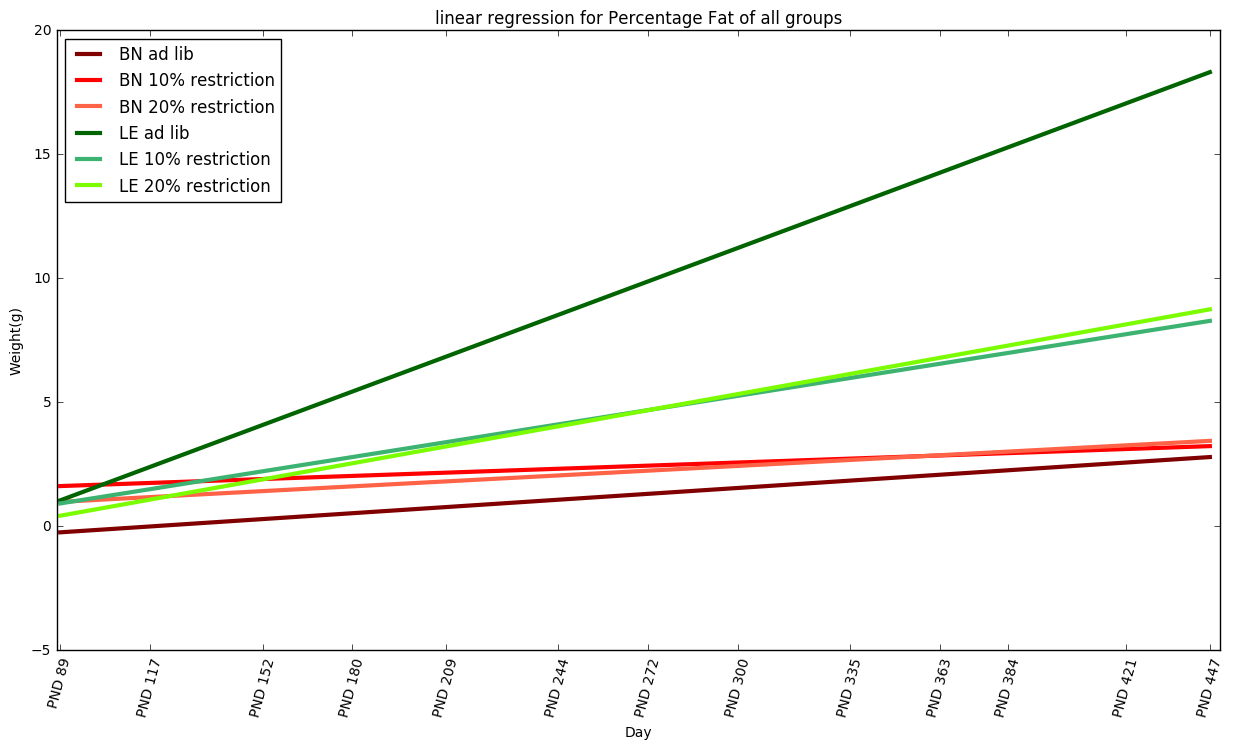

In [7]:
Fig=plt.figure(figsize=(15,8))
color=['maroon','red','tomato','darkgreen','mediumseagreen','lawngreen']
for i in range (6):
    plt.plot(np.asarray(day), fatprediction[i], color=color[i],linewidth=3,label=groups[i])
plt.legend(loc='upper left')
plt.xticks([89,117,152,180,209,244,272,300,335,363,384,421,447])
plt.xlim(88,450)
#plt.ylim(200,500)
plt.axes().set_xticklabels(sheetnames,rotation=75)
plt.title('linear regression for Percentage Fat of all groups')
plt.ylabel('Weight(g)')
plt.xlabel('Day')

# % Lean

BN ad lib percentage error is -0.460238697853
BN 10% restriction percentage error is -0.5089334684
BN 20% restriction percentage error is -0.178943538848
LE ad lib percentage error is -0.104464953521
LE 10% restriction percentage error is -3.18417175125
LE 20% restriction percentage error is -0.870261947661


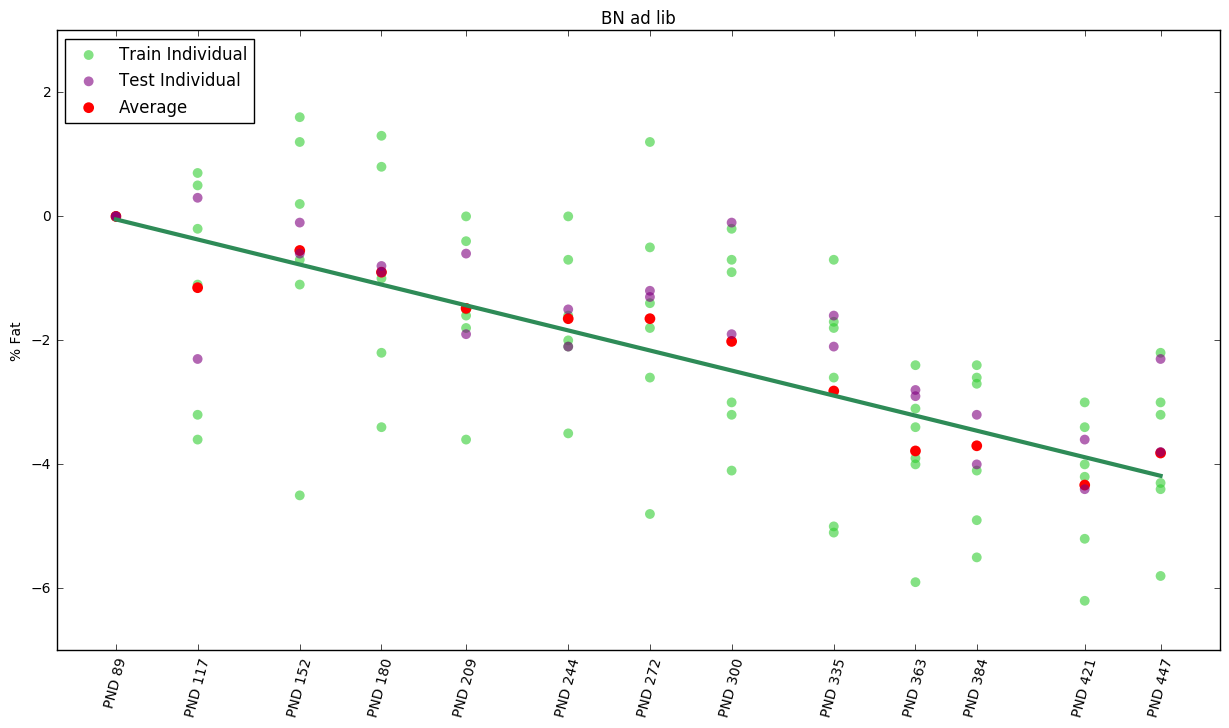

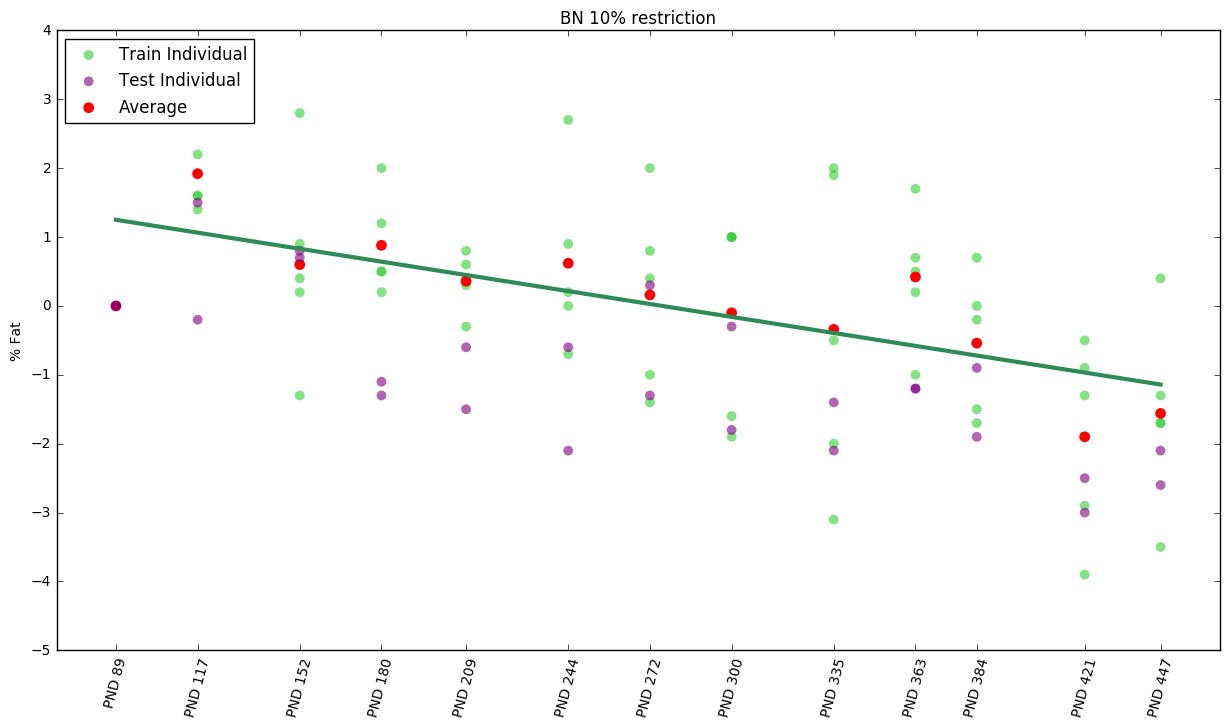

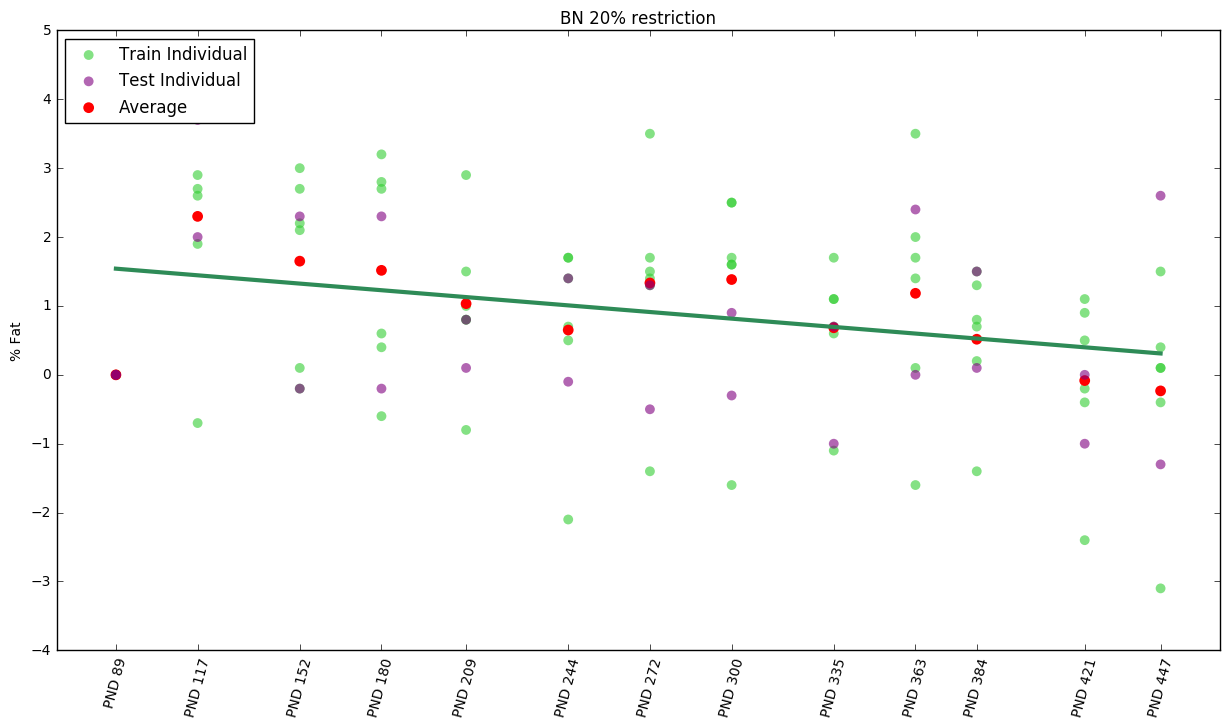

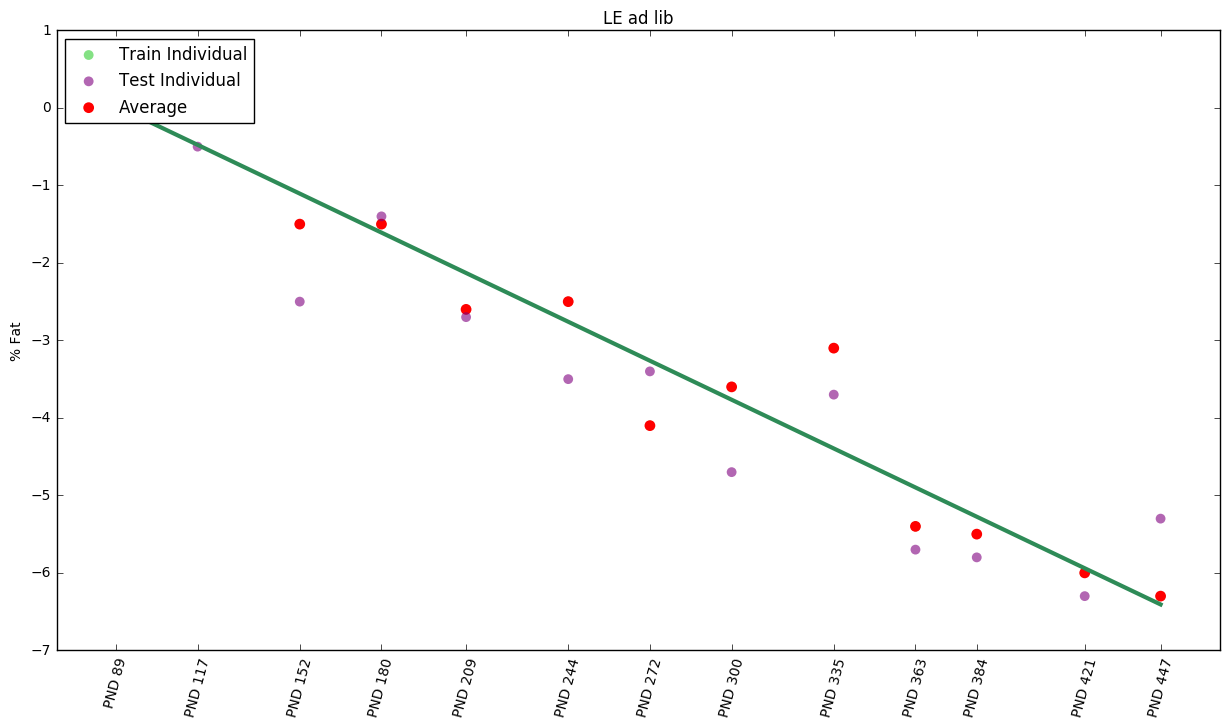

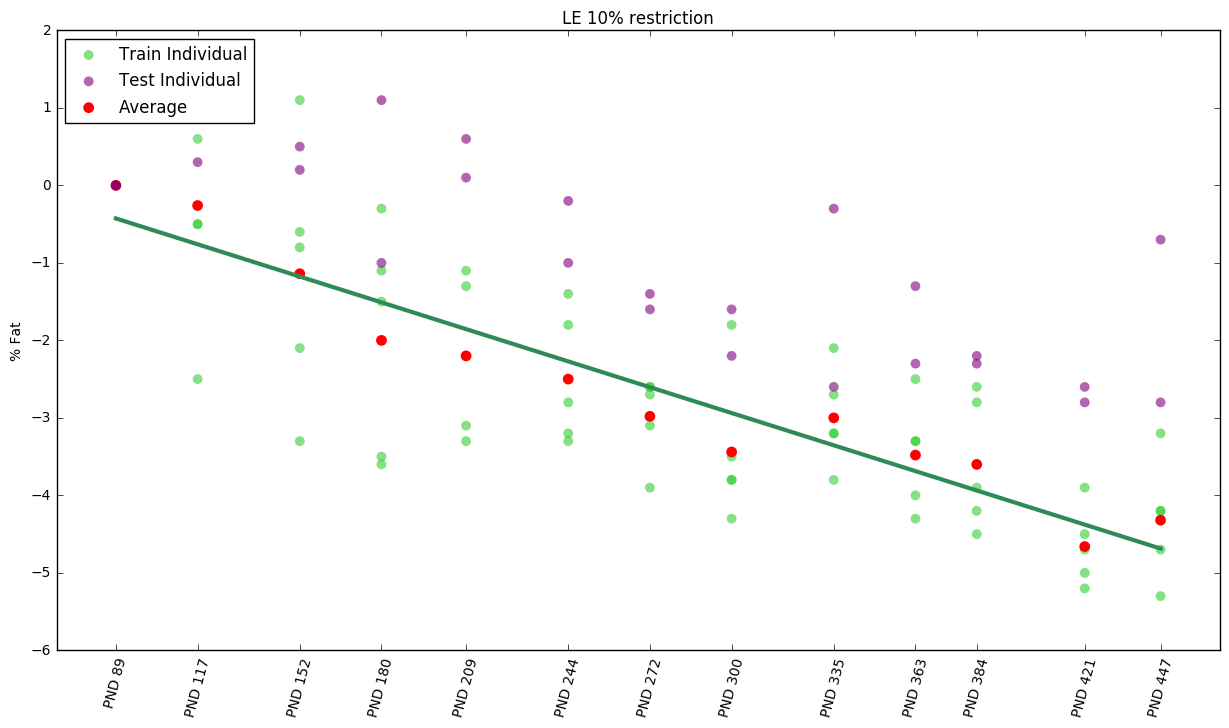

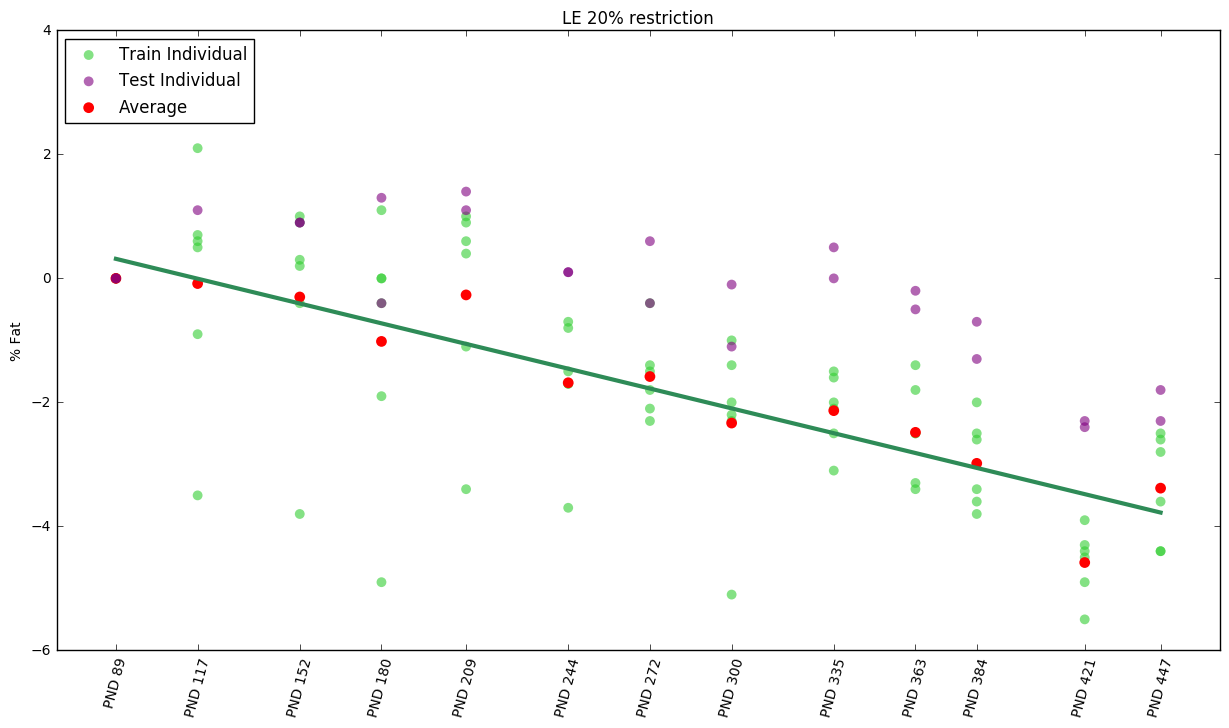

In [8]:
leprediction=[None]*6
for i in range(6):
    slope,intercept,percenterror,traindiff,avetraindiff,leprediction[i],testdiff=group_measure(groups[i],'% Lean')
    Fig=plt.figure(figsize=(15,8))
    for xe, ye in zip(day, traindiff):
        indi=plt.scatter([xe] * len(ye), ye, c="limegreen",alpha=0.6,s=50,edgecolors='none')
    plt.xticks([89,117,152,180,209,244,272,300,335,363,384,421,447])
    plt.axes().set_xticklabels(sheetnames,rotation=75)
# average point
    average=plt.scatter(day,avetraindiff, c="red",s=60,edgecolors='none',label="Aveage")
# plot linear regression
    plt.plot(np.asarray(day), leprediction[i], color='seagreen',linewidth=3)
# plot test group
    for xe, ye in zip(day, testdiff):
        testindi=plt.scatter([xe] * len(ye), ye, c="purple",alpha=0.6,s=50,edgecolors='none')
# set up figure 
    plt.legend((indi,testindi,average),('Train Individual','Test Individual','Average'),scatterpoints=1,loc='upper left')
    plt.title(groups[i])
    plt.ylabel('% Fat')
    print(groups[i],'percentage error is',percenterror)

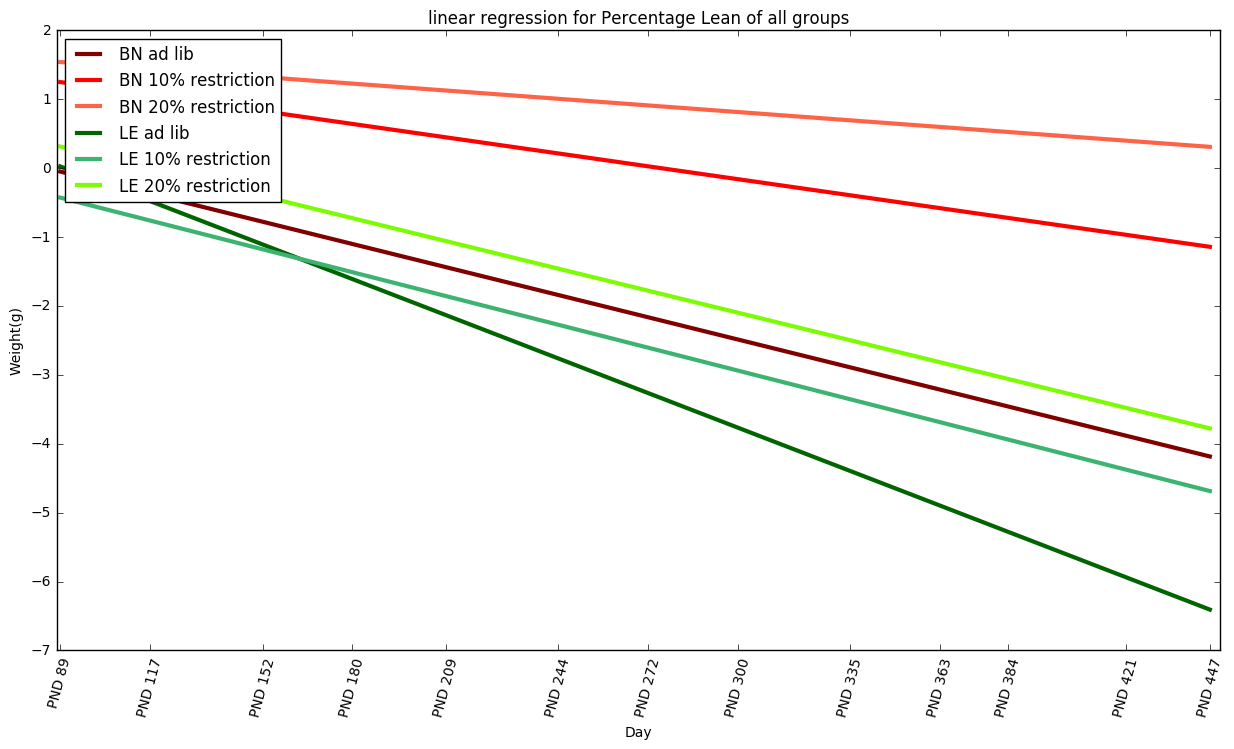

In [9]:
Fig=plt.figure(figsize=(15,8))
color=['maroon','red','tomato','darkgreen','mediumseagreen','lawngreen']
for i in range (6):
    plt.plot(np.asarray(day), leprediction[i], color=color[i],linewidth=3,label=groups[i])
plt.legend(loc='upper left')
plt.xticks([89,117,152,180,209,244,272,300,335,363,384,421,447])
plt.xlim(88,450)
#plt.ylim(200,500)
plt.axes().set_xticklabels(sheetnames,rotation=75)
plt.title('linear regression for Percentage Lean of all groups')
plt.ylabel('Weight(g)')
plt.xlabel('Day')

In [10]:
whos

Variable           Type              Data/Info
----------------------------------------------
Fig                Figure            Figure(1080x576)
LinearRegression   ABCMeta           <class 'sklearn.linear_mo<...>l.base.LinearRegression'>
PND117             DataFrame            Program Strain      Ag<...>6  0.049776    0.390398  
PND152             DataFrame            Program Strain      Ag<...>2  0.086474    0.374374  
PND180             DataFrame            Program Strain      Ag<...>9  0.086603    0.363883  
PND209             DataFrame            Program Strain      Ag<...>4  0.051539    0.446714  
PND244             DataFrame            Program Strain      Ag<...>4  0.084383    0.399553  
PND272             DataFrame            Program Strain      Ag<...>7  0.032733    0.562024  
PND300             DataFrame            Program Strain      Ag<...>5  0.035038    0.572276  
PND335             DataFrame            Program Strain      Ag<...>6  0.058056    0.552591  
PND363         